In [13]:
#Import dependencies

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import missingno as msno

In [7]:
# Read the CSV files that has data

train_data_df = pd.read_csv("static/data/train.csv")
test_data_df = pd.read_csv("static/data/test.csv")

train_data_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train_data_df.info()

#Cabin>Embarked>Age has null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


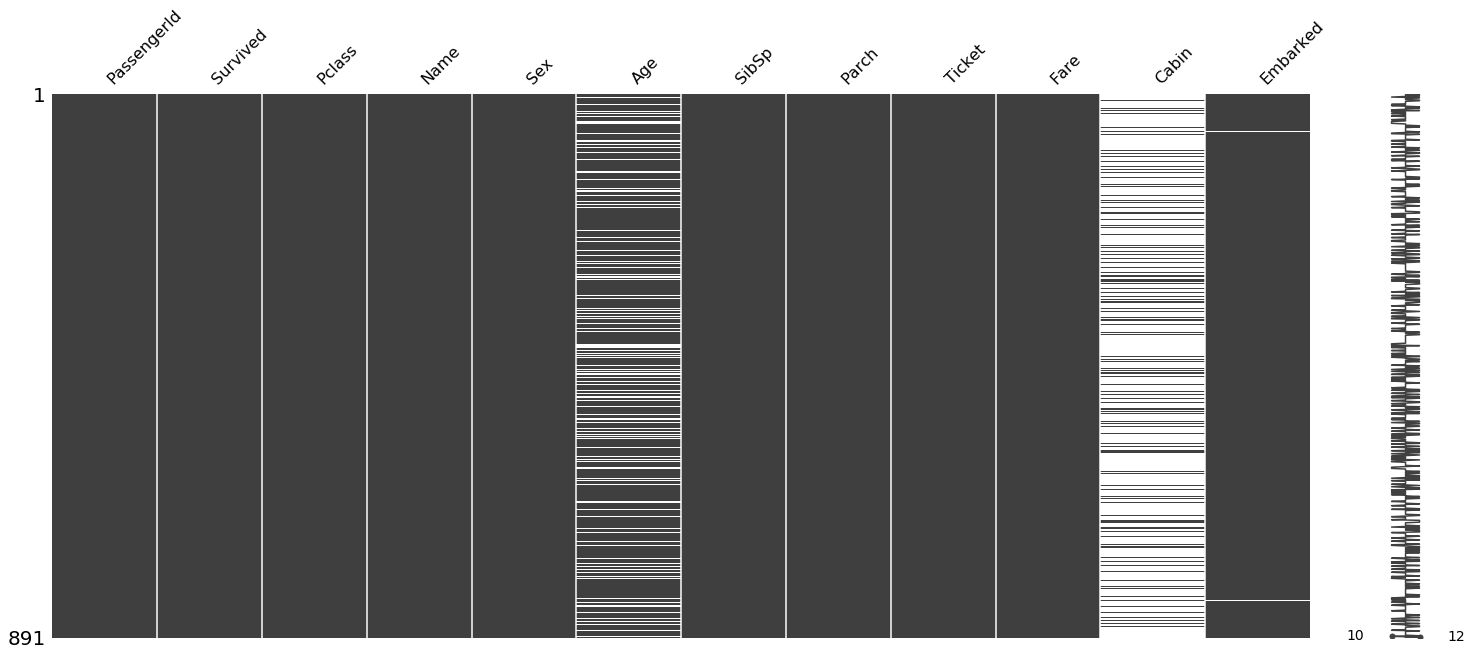

In [14]:
#Visualize missing values

msno.matrix(train_data_df) 

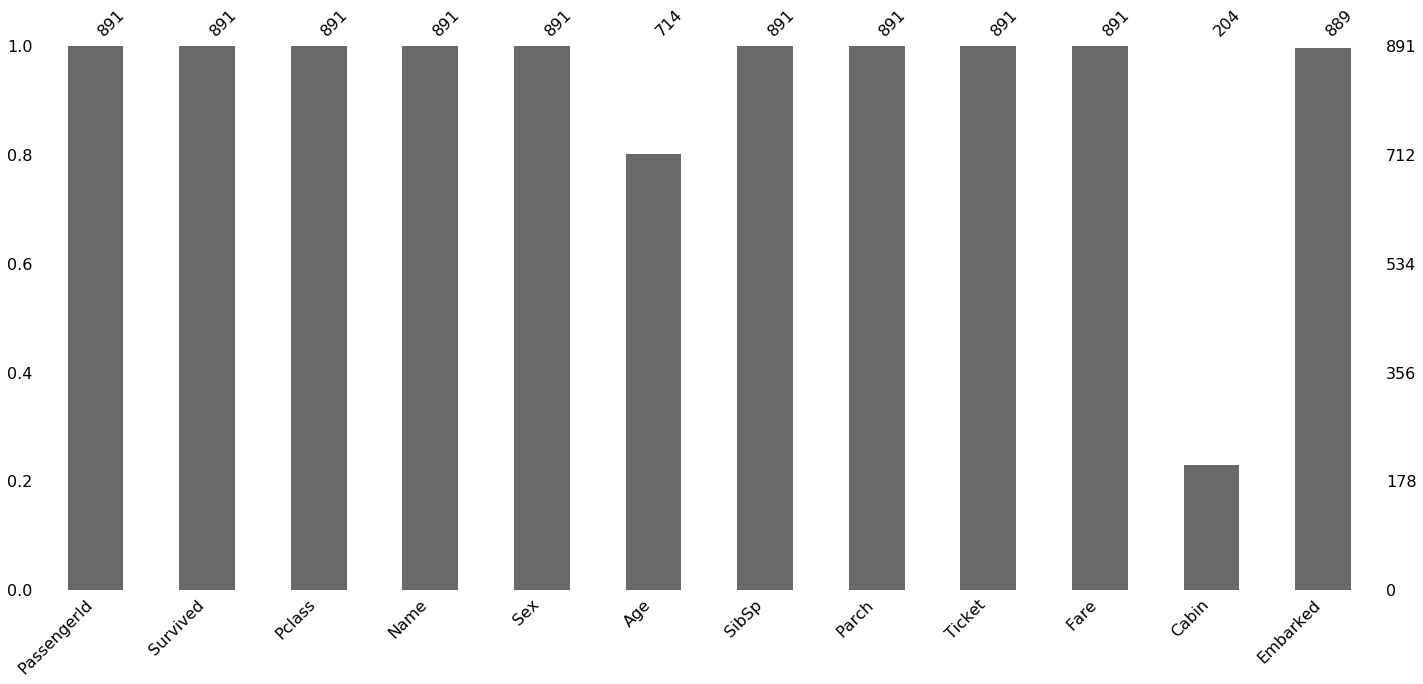

In [15]:
msno.bar(train_data_df)

In [29]:
# Creating features - Feature Engineering 
# Extract the 'Title','Surname','Name' from the 'Name' Column and crate new columns for the same

newsurname = train_data_df["Name"].str.split(",", n = 1, expand = True) 

newtitle = train_data_df["Name"].str.split(" ", n = 2, expand = True) 

newfullname = train_data_df["Name"].str.split(".", n = 1, expand = True) 

train_data_df['Surname'] = newsurname[0]

train_data_df['Title'] = newtitle[1]

train_data_df['FullName'] = newfullname[1]


train_data_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title,FullName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr.,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs.,John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss.,Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs.,Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr.,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila,Rev.,Juozas
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,Miss.,Margaret Edith
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,Miss.,"Catherine Helen ""Carrie"""
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr,Mr.,Karl Howell


In [ ]:
# Imputing missing values for the 'Embarked' column. It has 2 missing values.



In [8]:
# Create a dataframe for Replacement of null values

replacement_unknown_values = pd.DataFrame({
    "Unknwown Fare":train_data_df['Fare'].mode(),
    "Unknown Embark Point":train_data_df['Embarked'].mode(),
    "Unknown Age":train_data_df['Age'].median()})

replacement_unknown_values

,Unknwown Fare,Unknown Embark Point,Unknown Age
0,8.05,S,28.0


In [5]:
# Replacing null values (NaN) 

train_data_df["Age"] = train_data_df["Age"].fillna(28)
test_data_df["Age"] = test_data_df["Age"].fillna(28)

train_data_df["Embarked"] = train_data_df["Embarked"].fillna('S')
test_data_df["Embarked"] = test_data_df["Embarked"].fillna('S')

train_data_df["Fare"] = train_data_df["Fare"].fillna(8.05)
test_data_df["Fare"] = test_data_df["Fare"].fillna(8.05)

sex_mapping = {'male': 0, 'female': 1}
embarked_mapping = {'C': 1, 'Q': 2, 'S': 3}

train_data_df['Sex'] = train_data_df['Sex'].map(sex_mapping)
train_data_df['Embarked'] = train_data_df['Embarked'].map(embarked_mapping)

train_data_df.head()

test_data_df['Sex'] = test_data_df['Sex'].map(sex_mapping)
test_data_df['Embarked'] = test_data_df['Embarked'].map(embarked_mapping)


In [12]:
#Check null values
train_data_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [13]:
#Drop unwanted columns

train_data_df_new = train_data_df.drop(['Name', 'Ticket', 'Cabin'],axis=1,inplace=False)
train_data_df_new

test_data_df_new = test_data_df.drop(['Name', 'Ticket', 'Cabin'],axis=1,inplace=False)
test_data_df_new

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,3
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,3
3,4,1,1,1,35.0,1,0,53.1000,3
4,5,0,3,0,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,3
887,888,1,1,1,19.0,0,0,30.0000,3
888,889,0,3,1,28.0,1,2,23.4500,3
889,890,1,1,0,26.0,0,0,30.0000,1


In [14]:
# Assign X (data) and y (target)

X = train_data_df_new.drop("Survived", axis=1)
y = train_data_df_new["Survived"]
print(X.shape, y.shape)

(891, 8) (891,)


In [15]:
#Split data in to training and testing dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [16]:
#Create Logistic Regression model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [17]:
#Fit the model

classifier.fit(X_train, y_train)

C:\Users\conne\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [18]:
# Validate the model 

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8053892215568862
Testing Data Score: 0.7982062780269058


In [19]:
# Make predictions

predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [1 0 1 1 1 0 0 1 0 1]
First 10 Actual labels: [1, 0, 1, 0, 1, 0, 0, 1, 0, 1]


In [20]:
#
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,1,1
1,0,0
2,1,1
3,1,0
4,1,1
...,...,...
218,1,1
219,0,0
220,0,1
221,0,0
